# Exploration des données E-commerce Olist

## Objectifs :
1. Examiner la structure de chaque fichier CSV
2. Analyser la qualité des données (valeurs manquantes, doublons)
3. Comprendre les relations entre les tables
4. Identifier les transformations nécessaires pour le data warehouse

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# Chemin vers les données brutes
RAW_DATA_PATH = '/content/'

# Liste des fichiers CSV
csv_files = {
    'customers': 'olist_customers_dataset.csv',
    'geolocation': 'olist_geolocation_dataset.csv',
    'order_items': 'olist_order_items_dataset.csv',
    'order_payments': 'olist_order_payments_dataset.csv',
    'order_reviews': 'olist_order_reviews_dataset.csv',
    'orders': 'olist_orders_dataset.csv',
    'products': 'olist_products_dataset.csv',
    'sellers': 'olist_sellers_dataset.csv',
    'product_category': 'product_category_name_translation.csv'
}

## 1. Analyse initiale des données

Pour chaque fichier, nous allons examiner :
- Le nombre de lignes et colonnes
- Les types de données
- Les valeurs manquantes
- Les valeurs uniques pour les colonnes clés

=== Analyse de la table orders ===

Dimensions du DataFrame: (99441, 8)

Colonnes: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Types des données:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Aperçu des premières lignes:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



Valeurs manquantes par colonne:
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64

Distribution des statuts de commande:
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Pourcentage par statut:
order_status
delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: count, dtype: float64

Statistiques sur les délais de livraison (en jours):
count    96476.000000
mean        12.558702
std          9.546530
min          0.533414
25%          6.766403
50%         10.217755
75%         15.720327
max        209.628611
Name: delivery_time, dtype: float64


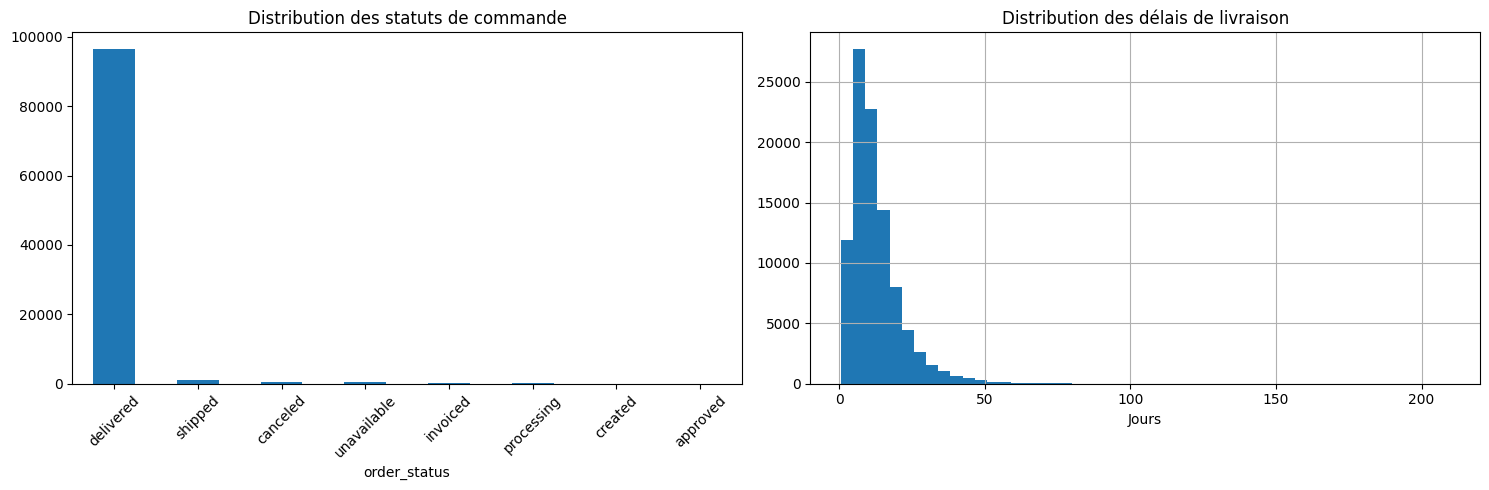

<ipython-input-11-496107581cb0>:63: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = orders_df.resample('M', on='order_purchase_timestamp').size()


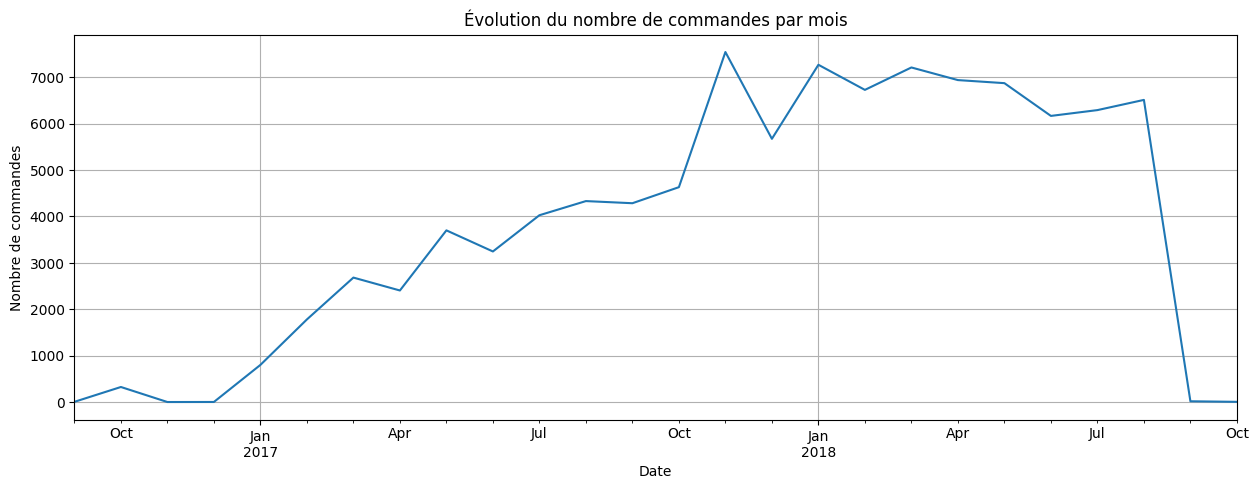

In [11]:
# Chargement de la table orders
try:
    orders_df = pd.read_csv(os.path.join(RAW_DATA_PATH, csv_files['orders']))

    print("=== Analyse de la table orders ===\n")

    # 1. Informations générales
    print("Dimensions du DataFrame:", orders_df.shape)
    print("\nColonnes:", list(orders_df.columns))
    print("\nTypes des données:")
    print(orders_df.dtypes)

    # 2. Aperçu des données
    print("\nAperçu des premières lignes:")
    display(orders_df.head())

    # 3. Analyse des valeurs manquantes
    missing_values = orders_df.isnull().sum()
    print("\nValeurs manquantes par colonne:")
    print(missing_values[missing_values > 0])

    # 4. Conversion des dates et analyse temporelle
    date_columns = ['order_purchase_timestamp', 'order_approved_at',
                   'order_delivered_carrier_date', 'order_delivered_customer_date',
                   'order_estimated_delivery_date']

    for col in date_columns:
        orders_df[col] = pd.to_datetime(orders_df[col])

    # 5. Distribution des statuts de commande
    print("\nDistribution des statuts de commande:")
    status_dist = orders_df['order_status'].value_counts()
    print(status_dist)
    print("\nPourcentage par statut:")
    print(status_dist / len(orders_df) * 100)

    # 6. Analyse des délais de livraison
    orders_df['delivery_time'] = (orders_df['order_delivered_customer_date'] -
                                orders_df['order_purchase_timestamp']).dt.total_seconds() / 86400

    print("\nStatistiques sur les délais de livraison (en jours):")
    print(orders_df['delivery_time'].describe())

    # 7. Visualisations
    plt.figure(figsize=(15, 5))

    # 7.1 Distribution des statuts
    plt.subplot(1, 2, 1)
    status_dist.plot(kind='bar')
    plt.title('Distribution des statuts de commande')
    plt.xticks(rotation=45)

    # 7.2 Distribution des délais de livraison
    plt.subplot(1, 2, 2)
    orders_df['delivery_time'].hist(bins=50)
    plt.title('Distribution des délais de livraison')
    plt.xlabel('Jours')

    plt.tight_layout()
    plt.show()

    # 8. Évolution temporelle des commandes
    monthly_orders = orders_df.resample('M', on='order_purchase_timestamp').size()

    plt.figure(figsize=(15, 5))
    monthly_orders.plot()
    plt.title('Évolution du nombre de commandes par mois')
    plt.xlabel('Date')
    plt.ylabel('Nombre de commandes')
    plt.grid(True)
    plt.show()

except FileNotFoundError:
    print("Erreur: Assurez-vous que les fichiers CSV sont bien présents dans le dossier '../data/raw/'")
except Exception as e:
    print(f"Une erreur s'est produite: {str(e)}")

=== Analyse de la table order_items ===

Dimensions du DataFrame: (112650, 7)

Colonnes: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Types des données:
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Aperçu des premières lignes:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



Statistiques descriptives:
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

Valeurs manquantes par colonne:
Aucune valeur manquante

Statistiques sur le nombre d'items par commande:
count    98666.000000
mean         1.141731
std          0.538452
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         21.000000
dtype: float64

Statistiques sur les prix:
              price  freight_value
min        0.850000        0.00000
max     6735.000000      409.68000
mean     120.653739       19.99032
median    74.990000       16.26000


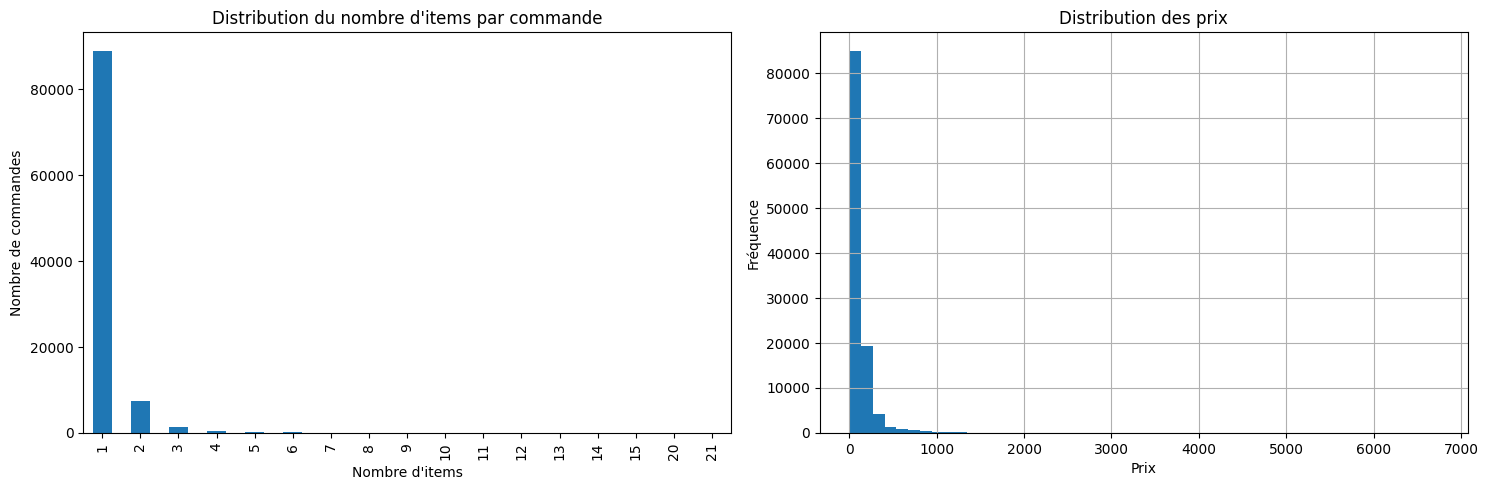


Top 10 vendeurs par nombre de ventes:
                                  nombre_ventes  chiffre_affaires  \
seller_id                                                           
6560211a19b47992c3666cc44a7e94c0           2033         123304.83   
4a3ca9315b744ce9f8e9374361493884           1987         200472.92   
1f50f920176fa81dab994f9023523100           1931         106939.21   
cc419e0650a3c5ba77189a1882b7556a           1775         104288.42   
da8622b14eb17ae2831f4ac5b9dab84a           1551         160236.57   
955fee9216a65b617aa5c0531780ce60           1499         135171.70   
1025f0e2d44d7041d6cf58b6550e0bfa           1428         138968.55   
7c67e1448b00f6e969d365cea6b010ab           1364         187923.89   
ea8482cd71df3c1969d7b9473ff13abc           1203          37177.52   
7a67c85e85bb2ce8582c35f2203ad736           1171         141745.53   

                                  total_frais_port  
seller_id                                           
6560211a19b47992c3666cc44a

In [13]:
# Analyse de la table order_items
try:
    print("=== Analyse de la table order_items ===\n")

    # Chargement des données
    order_items_df = pd.read_csv(os.path.join(RAW_DATA_PATH, csv_files['order_items']))

    # 1. Informations générales
    print("Dimensions du DataFrame:", order_items_df.shape)
    print("\nColonnes:", list(order_items_df.columns))
    print("\nTypes des données:")
    print(order_items_df.dtypes)

    # 2. Aperçu des données
    print("\nAperçu des premières lignes:")
    display(order_items_df.head())

    # 3. Statistiques descriptives
    print("\nStatistiques descriptives:")
    print(order_items_df.describe())

    # 4. Analyse des valeurs manquantes
    missing_values = order_items_df.isnull().sum()
    print("\nValeurs manquantes par colonne:")
    print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "Aucune valeur manquante")

    # 5. Analyses spécifiques
    # 5.1 Distribution des commandes par nombre d'items
    items_per_order = order_items_df.groupby('order_id').size()

    print("\nStatistiques sur le nombre d'items par commande:")
    print(items_per_order.describe())

    # 5.2 Analyse des prix
    print("\nStatistiques sur les prix:")
    price_stats = order_items_df.agg({
        'price': ['min', 'max', 'mean', 'median'],
        'freight_value': ['min', 'max', 'mean', 'median']
    })
    print(price_stats)

    # 6. Visualisations
    plt.figure(figsize=(15, 5))

    # 6.1 Distribution du nombre d'items par commande
    plt.subplot(1, 2, 1)
    items_per_order.value_counts().sort_index().plot(kind='bar')
    plt.title('Distribution du nombre d\'items par commande')
    plt.xlabel('Nombre d\'items')
    plt.ylabel('Nombre de commandes')

    # 6.2 Distribution des prix
    plt.subplot(1, 2, 2)
    order_items_df['price'].hist(bins=50)
    plt.title('Distribution des prix')
    plt.xlabel('Prix')
    plt.ylabel('Fréquence')

    plt.tight_layout()
    plt.show()

    # 7. Analyse des vendeurs
    sellers_analysis = order_items_df.groupby('seller_id').agg({
        'order_id': 'count',
        'price': 'sum',
        'freight_value': 'sum'
    }).rename(columns={
        'order_id': 'nombre_ventes',
        'price': 'chiffre_affaires',
        'freight_value': 'total_frais_port'
    })

    print("\nTop 10 vendeurs par nombre de ventes:")
    print(sellers_analysis.sort_values('nombre_ventes', ascending=False).head(10))

except FileNotFoundError:
    print("Erreur: Assurez-vous que le fichier order_items est présent dans le dossier '../data/raw/'")
except Exception as e:
    print(f"Une erreur s'est produite: {str(e)}")

=== Analyse de la table products ===

Dimensions du DataFrame products: (32951, 9)

Colonnes: ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

Types des données:
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

Aperçu des premières lignes:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



Valeurs manquantes par colonne:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Statistiques sur les dimensions des produits:
       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_

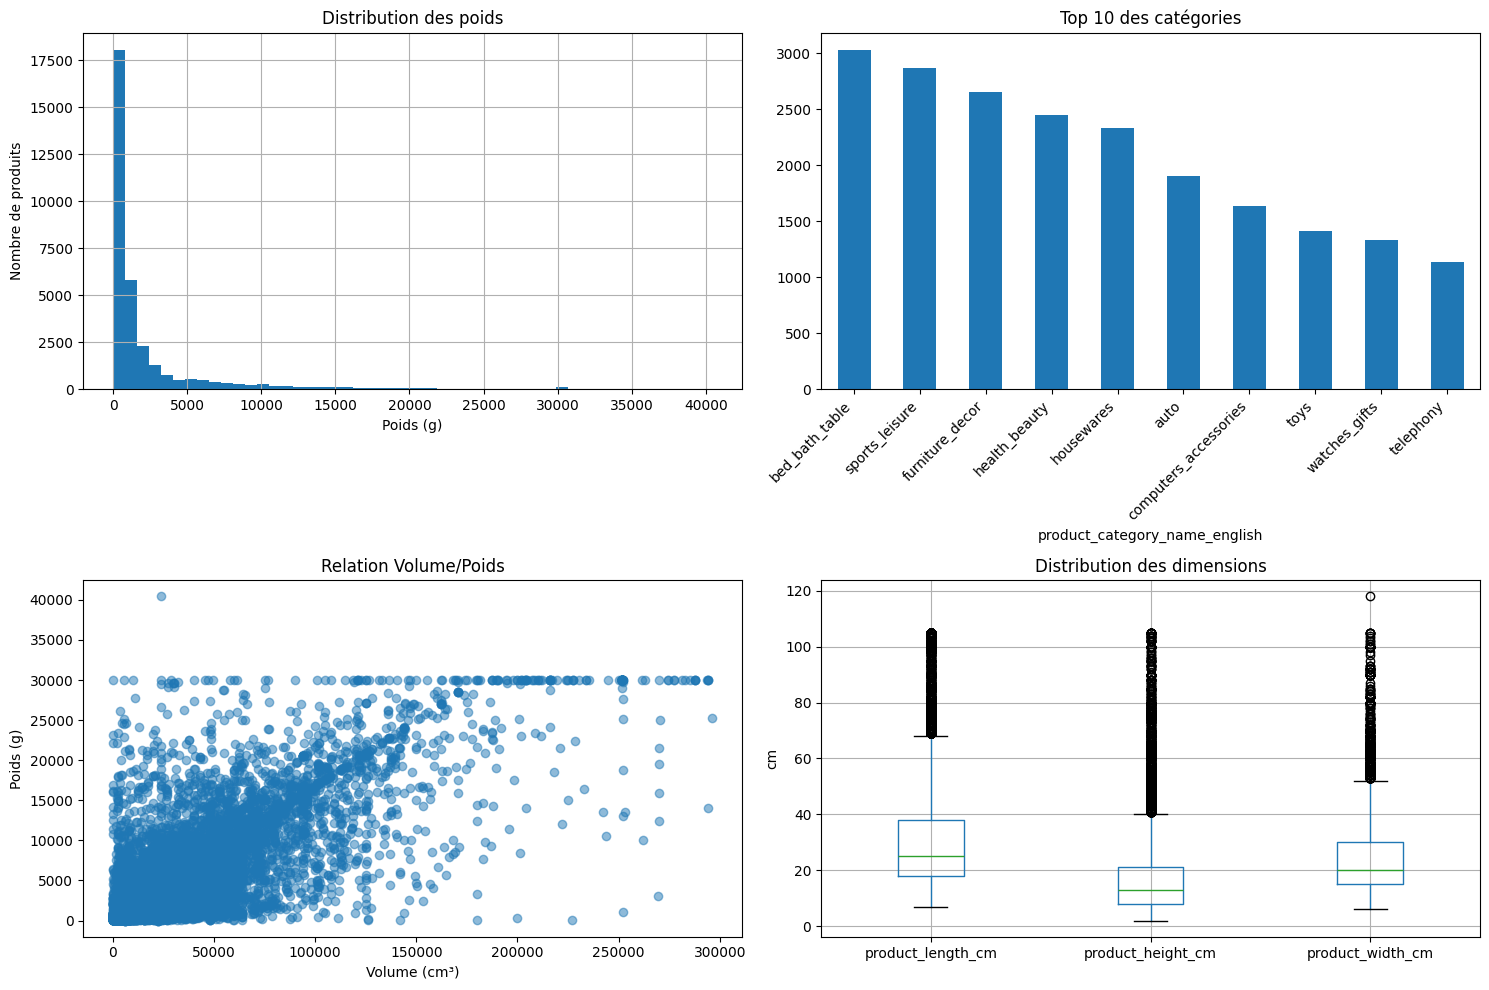


Statistiques sur le nombre de photos par produit:
count    32341.000000
mean         2.188986
std          1.736766
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         20.000000
Name: product_photos_qty, dtype: float64

Nombre total de catégories uniques: 73

Statistiques sur la densité des produits (g/cm³):
count    32949.000000
mean         0.203690
std          1.009271
min          0.000000
25%          0.066176
50%          0.116550
75%          0.195869
max         85.227273
Name: density, dtype: float64


In [14]:
# Analyse de la table products
try:
    print("=== Analyse de la table products ===\n")

    # 1. Chargement des données
    products_df = pd.read_csv(os.path.join(RAW_DATA_PATH, csv_files['products']))

    # Chargement de la table de traduction des catégories
    categories_df = pd.read_csv(os.path.join(RAW_DATA_PATH, csv_files['product_category']))

    # 2. Informations générales
    print("Dimensions du DataFrame products:", products_df.shape)
    print("\nColonnes:", list(products_df.columns))
    print("\nTypes des données:")
    print(products_df.dtypes)

    # 3. Aperçu des données
    print("\nAperçu des premières lignes:")
    display(products_df.head())

    # 4. Analyse des valeurs manquantes
    missing_values = products_df.isnull().sum()
    print("\nValeurs manquantes par colonne:")
    print(missing_values)

    # 5. Analyse des dimensions des produits
    print("\nStatistiques sur les dimensions des produits:")
    dimension_cols = ['product_weight_g', 'product_length_cm',
                     'product_height_cm', 'product_width_cm']
    print(products_df[dimension_cols].describe())

    # 6. Analyse des catégories
    # Fusion avec la table de traduction
    products_with_categories = products_df.merge(
        categories_df,
        left_on='product_category_name',
        right_on='product_category_name',
        how='left'
    )

    # Top 20 des catégories
    category_counts = products_with_categories['product_category_name_english'].value_counts()

    print("\nTop 20 des catégories de produits:")
    print(category_counts.head(20))

    # 7. Visualisations
    plt.figure(figsize=(15, 10))

    # 7.1 Distribution des poids
    plt.subplot(2, 2, 1)
    products_df['product_weight_g'].hist(bins=50)
    plt.title('Distribution des poids')
    plt.xlabel('Poids (g)')
    plt.ylabel('Nombre de produits')

    # 7.2 Top 10 catégories
    plt.subplot(2, 2, 2)
    category_counts.head(10).plot(kind='bar')
    plt.title('Top 10 des catégories')
    plt.xticks(rotation=45, ha='right')

    # 7.3 Relation poids/volume
    plt.subplot(2, 2, 3)
    products_df['volume'] = (products_df['product_length_cm'] *
                           products_df['product_height_cm'] *
                           products_df['product_width_cm'])
    plt.scatter(products_df['volume'], products_df['product_weight_g'], alpha=0.5)
    plt.title('Relation Volume/Poids')
    plt.xlabel('Volume (cm³)')
    plt.ylabel('Poids (g)')

    # 7.4 Distribution des dimensions
    plt.subplot(2, 2, 4)
    products_df[['product_length_cm', 'product_height_cm',
                 'product_width_cm']].boxplot()
    plt.title('Distribution des dimensions')
    plt.ylabel('cm')

    plt.tight_layout()
    plt.show()

    # 8. Analyse des photos de produits
    print("\nStatistiques sur le nombre de photos par produit:")
    print(products_df['product_photos_qty'].describe())

    # 9. Calcul de métriques supplémentaires
    print("\nNombre total de catégories uniques:",
          products_df['product_category_name'].nunique())

    # Densité moyenne des produits (g/cm³)
    products_df['density'] = (products_df['product_weight_g'] /
                            (products_df['volume'].replace(0, np.nan)))

    print("\nStatistiques sur la densité des produits (g/cm³):")
    print(products_df['density'].describe())

except FileNotFoundError:
    print("Erreur: Assurez-vous que les fichiers products sont présents dans le dossier '../data/raw/'")
except Exception as e:
    print(f"Une erreur s'est produite: {str(e)}")

=== Analyse de la table order_payments ===

Dimensions du DataFrame: (103886, 5)

Colonnes: ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

Types des données:
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

Aperçu des premières lignes:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



Valeurs manquantes par colonne:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Distribution des méthodes de paiement:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

Pourcentage par méthode de paiement:
payment_type
credit_card    73.92
boleto         19.04
voucher         5.56
debit_card      1.47
not_defined     0.00
Name: count, dtype: float64 %

Statistiques sur les montants de paiement:
count    103886.00
mean        154.10
std         217.49
min           0.00
25%          56.79
50%         100.00
75%         171.84
max       13664.08
Name: payment_value, dtype: float64

Distribution du nombre de versements:
payment_installments
0         2
1     52546
2     12413
3     10461
4      7098
5      5239
6      3920
7      1626
8      4268
9       644
10     5328
11       23
12      133
13    

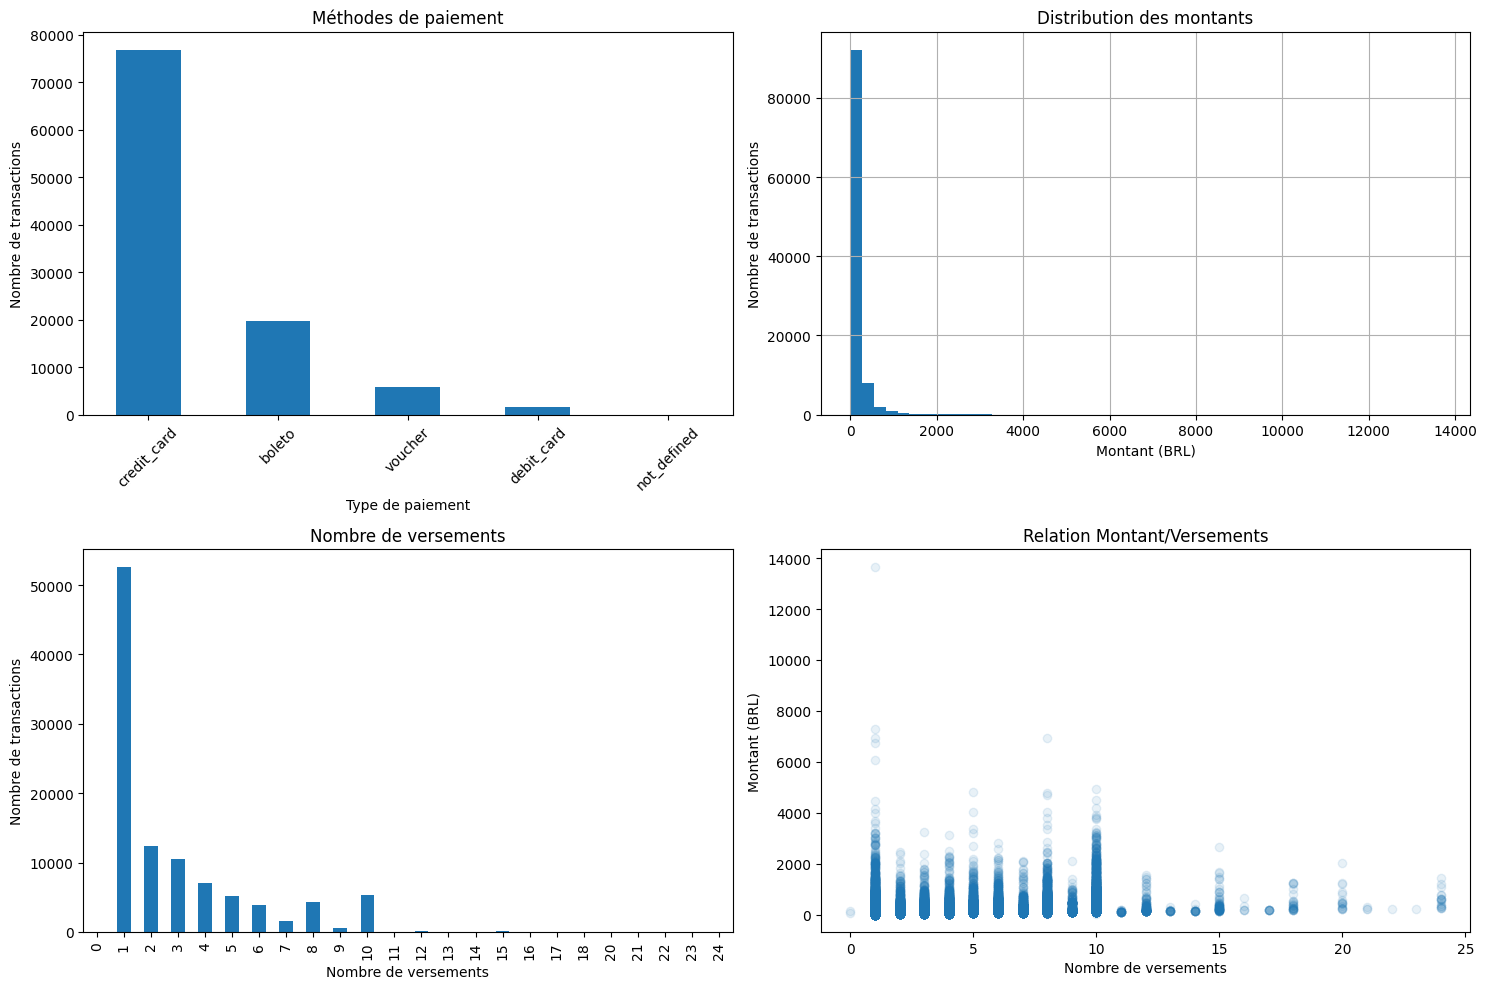


Analyse par type de paiement:
                mean  count          sum
payment_type                            
boleto        145.03  19784   2869361.27
credit_card   163.32  76795  12542084.19
debit_card    142.57   1529    217989.79
not_defined     0.00      3         0.00
voucher        65.70   5775    379436.87

Analyse par nombre de versements:
                        mean  count         sum
payment_installments                           
0                      94.32      2      188.63
1                     112.42  52546  5907233.36
2                     127.23  12413  1579283.03
3                     142.54  10461  1491103.80
4                     163.98   7098  1163907.61
5                     183.47   5239   961174.30
6                     209.85   3920   822611.81
7                     187.67   1626   305157.39
8                     307.74   4268  1313423.34
9                     203.44    644   131015.92
10                    415.09   5328  2211577.34
11                    1

In [15]:
# Analyse de la table order_payments
try:
    print("=== Analyse de la table order_payments ===\n")

    # 1. Chargement des données
    payments_df = pd.read_csv(os.path.join(RAW_DATA_PATH, csv_files['order_payments']))

    # 2. Informations générales
    print("Dimensions du DataFrame:", payments_df.shape)
    print("\nColonnes:", list(payments_df.columns))
    print("\nTypes des données:")
    print(payments_df.dtypes)

    # 3. Aperçu des données
    print("\nAperçu des premières lignes:")
    display(payments_df.head())

    # 4. Analyse des valeurs manquantes
    missing_values = payments_df.isnull().sum()
    print("\nValeurs manquantes par colonne:")
    print(missing_values)

    # 5. Analyse des méthodes de paiement
    payment_types = payments_df['payment_type'].value_counts()
    print("\nDistribution des méthodes de paiement:")
    print(payment_types)
    print("\nPourcentage par méthode de paiement:")
    print((payment_types / len(payments_df) * 100).round(2), "%")

    # 6. Analyse des montants
    print("\nStatistiques sur les montants de paiement:")
    print(payments_df['payment_value'].describe().round(2))

    # 7. Analyse du nombre de versements
    installments_stats = payments_df['payment_installments'].value_counts().sort_index()
    print("\nDistribution du nombre de versements:")
    print(installments_stats)

    # 8. Visualisations
    plt.figure(figsize=(15, 10))

    # 8.1 Distribution des méthodes de paiement
    plt.subplot(2, 2, 1)
    payment_types.plot(kind='bar')
    plt.title('Méthodes de paiement')
    plt.xlabel('Type de paiement')
    plt.ylabel('Nombre de transactions')
    plt.xticks(rotation=45)

    # 8.2 Distribution des montants
    plt.subplot(2, 2, 2)
    payments_df['payment_value'].hist(bins=50)
    plt.title('Distribution des montants')
    plt.xlabel('Montant (BRL)')
    plt.ylabel('Nombre de transactions')

    # 8.3 Distribution du nombre de versements
    plt.subplot(2, 2, 3)
    installments_stats.plot(kind='bar')
    plt.title('Nombre de versements')
    plt.xlabel('Nombre de versements')
    plt.ylabel('Nombre de transactions')

    # 8.4 Relation montant/versements
    plt.subplot(2, 2, 4)
    plt.scatter(payments_df['payment_installments'],
               payments_df['payment_value'],
               alpha=0.1)
    plt.title('Relation Montant/Versements')
    plt.xlabel('Nombre de versements')
    plt.ylabel('Montant (BRL)')

    plt.tight_layout()
    plt.show()

    # 9. Analyses supplémentaires
    # Montant moyen par type de paiement
    avg_by_type = payments_df.groupby('payment_type')['payment_value'].agg(['mean', 'count', 'sum']).round(2)
    print("\nAnalyse par type de paiement:")
    print(avg_by_type)

    # Montant moyen par nombre de versements
    avg_by_installments = payments_df.groupby('payment_installments')['payment_value'].agg(['mean', 'count', 'sum']).round(2)
    print("\nAnalyse par nombre de versements:")
    print(avg_by_installments)

    # 10. Vérification de la cohérence avec les commandes
    unique_orders = payments_df['order_id'].nunique()
    print(f"\nNombre de commandes uniques dans payments: {unique_orders}")

    # Calcul du montant total par commande
    order_totals = payments_df.groupby('order_id')['payment_value'].sum()
    print("\nStatistiques sur les montants totaux par commande:")
    print(order_totals.describe().round(2))

except FileNotFoundError:
    print("Erreur: Assurez-vous que le fichier order_payments est présent dans le dossier '../data/raw/'")
except Exception as e:
    print(f"Une erreur s'est produite: {str(e)}")